<a href="https://colab.research.google.com/github/Vineela-Kandru/ML_Homework_Projects/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**DATASET**

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Preparing the dataset**

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

**Preparation**:

* Fill missing values with zeros.

* Apply the log transform to median_house_value.

* Do train/validation/test split with 60%/20%/20% distribution.

* Use the train_test_split function and set the random_state parameter to 1.

* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [4]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [5]:
df.ocean_proximity.value_counts()

<1H OCEAN    9136
INLAND       6551
Name: ocean_proximity, dtype: int64

In [6]:
# Fill missing values with zeros.

df = df.fillna(0)

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
#Splitting the data 60/20/20

#full_train
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

#Train and Validation sets
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state =1)

In [8]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [9]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [10]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [11]:
val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [12]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

**Question 1**

Let's train a decision tree regressor to predict the median_house_value variable.

Train a model with max_depth=1.

**Which feature is used for splitting the data?**

***ANSWER: ocean_proximity***

In [13]:
#  training a decision tree regressor to predict the median_house_value variable.

dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train,y_train)

from sklearn.tree import export_text
export_text(dtr, feature_names= dv.feature_names_)

'|--- ocean_proximity=<1H OCEAN <= 0.50\n|   |--- value: [11.61]\n|--- ocean_proximity=<1H OCEAN >  0.50\n|   |--- value: [12.30]\n'

**Question 2**

Train a random forest model with these parameters:

* n_estimators=10

* random_state=1

* n_jobs=-1 (optional - to make training faster)

**What's the RMSE of this model on validation?**

***ANSWER: 0.245***

In [14]:
# Training a random forest model

rf = RandomForestRegressor(n_estimators=10,random_state = 1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [15]:
y_pred = rf.predict(X_val)

In [16]:
y_pred

array([12.21720358, 12.11642888, 11.57222122, ..., 11.73604439,
       11.25269032, 11.65289907])

In [17]:
# Calculating RMSE

def rmse(y,y_pred):
  error = y - y_pred
  se = error**2
  mse = se.mean()
  return np.sqrt(mse)

In [18]:
score = rmse(y_val, y_pred)

print('RMSE of Random Forest model on validation is : ',score.round(3))

RMSE of Random Forest model on validation is :  0.245


**Question 3**

Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

**After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.**

***ANSWER: 160***

In [19]:
for n in range(10,201,10):
  rf = RandomForestRegressor(n_estimators=n,random_state = 1, n_jobs=-1)
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_val)

  score = rmse(y_val, y_pred)
  print('RMSE when n_estimator = ', n , ' is : ',score.round(3))

RMSE when n_estimator =  10  is :  0.245
RMSE when n_estimator =  20  is :  0.238
RMSE when n_estimator =  30  is :  0.237
RMSE when n_estimator =  40  is :  0.235
RMSE when n_estimator =  50  is :  0.235
RMSE when n_estimator =  60  is :  0.235
RMSE when n_estimator =  70  is :  0.234
RMSE when n_estimator =  80  is :  0.235
RMSE when n_estimator =  90  is :  0.234
RMSE when n_estimator =  100  is :  0.234
RMSE when n_estimator =  110  is :  0.234
RMSE when n_estimator =  120  is :  0.234
RMSE when n_estimator =  130  is :  0.234
RMSE when n_estimator =  140  is :  0.234
RMSE when n_estimator =  150  is :  0.234
RMSE when n_estimator =  160  is :  0.233
RMSE when n_estimator =  170  is :  0.233
RMSE when n_estimator =  180  is :  0.234
RMSE when n_estimator =  190  is :  0.234
RMSE when n_estimator =  200  is :  0.234


**Question 4**

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]

* For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)

* calculate the mean RMSE

* Fix the random seed: random_state=1

**What's the best max_depth, using the mean RMSE?**

***ANSWER: 25***

In [164]:
scores =[]

for d in [10, 15, 20, 25]:
  for n in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=n,max_depth=d,random_state = 1, warm_start=True,n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)

    score = rmse(y_val, y_pred)
    scores.append((d,n,score))

In [165]:
columns = ['max_depth', 'n_estimators', 'RMSE']
df_scores = pd.DataFrame(scores,columns=columns)

In [166]:
df_scores

,max_depth,n_estimators,RMSE
0,10,10,0.250682
1,10,20,0.247455
2,10,30,0.246264
3,10,40,0.245029
4,10,50,0.245430
...,...,...,...
75,25,160,0.233395
76,25,170,0.233390
77,25,180,0.233572
78,25,190,0.233811


In [167]:
# Group by 'max_depth' and calculating the average RMSE for each 'max_depth'
avg_rmse_by_max_depth = df_scores.groupby('max_depth')['RMSE'].mean()

best_max_depth = avg_rmse_by_max_depth.idxmin()

print(f"The best max_depth for the lowest average RMSE is: {best_max_depth}")

The best max_depth for the lowest average RMSE is: 25


In [168]:
avg_rmse_by_max_depth

max_depth
10    0.245441
15    0.235938
20    0.235284
25    0.234896
Name: RMSE, dtype: float64

**Question 5**

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:

n_estimators=10,max_depth=20,random_state=1,n_jobs=-1 (optional)

Get the feature importance information from this model

**What's the most important feature (among these 4)?**

***ANSWER: median_income***

In [25]:
# Model Training
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# Feature importances
feature_importances = rf.feature_importances_

feature_names = dv.feature_names_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

print(importance_df)

print('\n')

most_important_feature = importance_df.loc[importance_df['Importance'].idxmax()]['Feature']

print(f"The most important feature is: {most_important_feature}")

                     Feature  Importance
0                 households    0.014953
1         housing_median_age    0.030194
2                   latitude    0.101891
3                  longitude    0.086176
4              median_income    0.335668
5  ocean_proximity=<1H OCEAN    0.292473
6     ocean_proximity=INLAND    0.073806
7                 population    0.026821
8             total_bedrooms    0.016245
9                total_rooms    0.021772


The most important feature is: median_income


**Question 6**

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost

Create DMatrix for train and validation

Create a watchlist

Train a model with these parameters for 100 rounds:

Now change eta from 0.3 to 0.1.

**Which eta leads to the best RMSE score on the validation dataset?**

***ANSWER : 0.3***


In [34]:
import xgboost as xgb

In [95]:
features = dv.feature_names_

print(features)

features[5] = features[5].replace("<","")

print(features)

['households', 'housing_median_age', 'latitude', 'longitude', 'median_income', 'ocean_proximity=1H OCEAN', 'ocean_proximity=INLAND', 'population', 'total_bedrooms', 'total_rooms']
['households', 'housing_median_age', 'latitude', 'longitude', 'median_income', 'ocean_proximity=1H OCEAN', 'ocean_proximity=INLAND', 'population', 'total_bedrooms', 'total_rooms']


In [136]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [135]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [137]:
y_pred = model.predict(dval)
RMSE = rmse(y_val,y_pred)

In [138]:
RMSE

0.228623199980106

In [139]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [144]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_RMSE', 'VAL_RMSE']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [145]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=10, evals=watchlist)

In [146]:
scores['eta_0.3'] = parse_xgb_output(output)

In [147]:
scores['eta_0.3']

,num_iter,train_RMSE,VAL_RMSE
0,0,0.44350,0.44250
1,10,0.21444,0.25179
2,20,0.18524,0.23978
3,30,0.16888,0.23570
4,40,0.15542,0.23318
5,50,0.14536,0.23225
6,60,0.13719,0.23139
7,70,0.12943,0.23068
8,80,0.12192,0.22886
9,90,0.11496,0.22861


In [157]:
scores['eta_0.3'].VAL_RMSE.round(3)

0     0.442
1     0.252
2     0.240
3     0.236
4     0.233
5     0.232
6     0.231
7     0.231
8     0.229
9     0.229
10    0.229
Name: VAL_RMSE, dtype: float64

In [152]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=10, evals=watchlist)

In [159]:
scores['eta_0.1'] = parse_xgb_output(output)

scores['eta_0.1'].VAL_RMSE.round(3)

0     0.520
1     0.314
2     0.269
3     0.253
4     0.245
5     0.240
6     0.238
7     0.236
8     0.235
9     0.233
10    0.232
Name: VAL_RMSE, dtype: float64

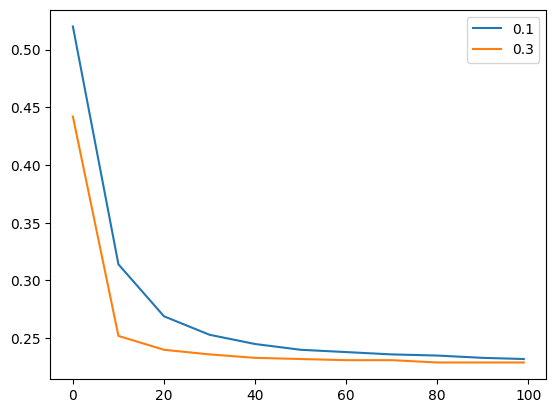

In [160]:
plt.plot(scores['eta_0.1'].num_iter, scores['eta_0.1'].VAL_RMSE.round(3), label='0.1')
plt.plot(scores['eta_0.3'].num_iter, scores['eta_0.3'].VAL_RMSE.round(3), label='0.3')
plt.legend()
plt.show()

In [163]:
eta1_rmse = scores['eta_0.1'].VAL_RMSE.iloc[-1]
eta3_rmse = scores['eta_0.3'].VAL_RMSE.iloc[-1]

if eta1_rmse < eta3_rmse:
    print(f"eta=0.1 has a lower RMSE ({eta1_rmse})")
elif eta3_rmse < eta1_rmse:
    print(f"eta=0.3 has a lower RMSE ({eta3_rmse})")
else:
    print("Both eta values have the same RMSE.")

eta=0.3 has a lower RMSE (0.22862)
